### Questions: 

-	How does median household income relate to housing affordability across Iowa counties?

-	Which Iowa counties experienced the greatest changes in rent, home value, and income from 2019 to 2022?

-	Are housing costs rising faster than incomes in certain counties, and what might this mean for housing stability?

## Get data

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [4]:
# Load your CSV file of Iowa counties + FIPS
counties_df = pd.read_csv("Iowa_Counties_FIPS.csv")

# initialize the needed years 
years = ["2019", "2020", "2021", "2022"]

# Prepare results dictionary
results = {
    "County": [],
    "State": [],
    "Year": [],
    "MedianRent": [],
    "MedianHomeValue": [],
    "Population": []
}

VARS = "B25064_001E,B25077_001E,B01003_001E"

# Loop through each year
for year in years:
    BASE = f"https://api.census.gov/data/{year}/acs/acs5"

    # Loop through each county
    for index, row in counties_df.iterrows():
        county_name = row["County"]
        fips = str(row["FIPS"])[-3:]  # last 3 digits

        params = {
            "get": f"NAME,{VARS}",
            "for": f"county:{fips}",
            "in": "state:19"
        }

        try:
            resp = requests.get(BASE, params=params, timeout=10)
            resp.raise_for_status()
            data = resp.json()

            # Extract API response
            name, rent, home_value, population, county_code, state_code = data[1]

            results["County"].append(county_name)
            results["State"].append("IA")
            results["Year"].append(year)
            results["MedianRent"].append(int(rent))
            results["MedianHomeValue"].append(int(home_value))
            results["Population"].append(int(population))

        except Exception as e:
            print(f"Error fetching data for {county_name}, {year}: {e}")

            results["County"].append(county_name)
            results["State"].append("IA")
            results["Year"].append(year)
            results["MedianRent"].append(None)
            results["MedianHomeValue"].append(None)
            results["Population"].append(None)

        sleep(0.5)

# Convert results to DataFrame
home_df = pd.DataFrame(results)

print(home_df)

# Save to CSV
home_df.to_csv("ia_county_housing_2019_2022.csv", index=False)
print("\nSaved as ia_county_housing_2019_2022.csv")

                County State  Year  MedianRent  MedianHomeValue  Population
0         Adair County    IA  2019         585           104600        7085
1         Adams County    IA  2019         549            87500        3670
2     Allamakee County    IA  2019         620           130400       13813
3     Appanoose County    IA  2019         624            81400       12452
4       Audubon County    IA  2019         582            79500        5571
..                 ...   ...   ...         ...              ...         ...
391   Winnebago County    IA  2022         669           121700       10704
392  Winneshiek County    IA  2022         763           225400       20050
393    Woodbury County    IA  2022         913           158000      105526
394       Worth County    IA  2022         685           130600        7417
395      Wright County    IA  2022         731           105400       12897

[396 rows x 6 columns]

Saved as ia_county_housing_2019_2022.csv


In [5]:
# Load the CSV file into a pandas DataFrame
income_df = pd.read_csv("Iowa_Median_Household_Income_in_the_Past_12_Months_(ACS_5-Year_Estimates)_20251113.csv")
display(income_df.head(15))

,Geography ID,Type,Name,Variable,Variable Description,Data Collection Period,Data Collection End Date,Median Household Income,Location
0,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,"51,129",POINT (-93.4933473 42.0700243)
1,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2009-2013,12/31/2013,"51,843",POINT (-93.4933473 42.0700243)
2,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2010-2014,12/31/2014,"52,716",POINT (-93.4933473 42.0700243)
3,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2011-2015,12/31/2015,"53,183",POINT (-93.4933473 42.0700243)
4,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2012-2016,12/31/2016,"54,570",POINT (-93.4933473 42.0700243)
5,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2013-2017,12/31/2017,"56,570",POINT (-93.4933473 42.0700243)
6,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2014-2018,12/31/2018,"58,580",POINT (-93.4933473 42.0700243)
7,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"60,523",POINT (-93.4933473 42.0700243)
8,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2016-2020,12/31/2020,"61,836",POINT (-93.4933473 42.0700243)
9,0400000US19,state,Iowa,B19013_001E,Median household income in the past 12 months ...,2017-2021,12/31/2021,"65,429",POINT (-93.4933473 42.0700243)


## Clean home data

In [7]:
# load the CSV file into a pandas DataFrame
home_df = pd.read_csv("ia_county_housing_2019_2022.csv")

print(home_df.dtypes)
display(home_df)

County             object
State              object
Year                int64
MedianRent          int64
MedianHomeValue     int64
Population          int64
dtype: object


,County,State,Year,MedianRent,MedianHomeValue,Population
0,Adair County,IA,2019,585,104600,7085
1,Adams County,IA,2019,549,87500,3670
2,Allamakee County,IA,2019,620,130400,13813
3,Appanoose County,IA,2019,624,81400,12452
4,Audubon County,IA,2019,582,79500,5571
...,...,...,...,...,...,...
391,Winnebago County,IA,2022,669,121700,10704
392,Winneshiek County,IA,2022,763,225400,20050
393,Woodbury County,IA,2022,913,158000,105526
394,Worth County,IA,2022,685,130600,7417


In [8]:
# remove "County" at the end of every county
home_df["County"] = home_df["County"].str.replace(" County", "", regex=False)

display(home_df)

,County,State,Year,MedianRent,MedianHomeValue,Population
0,Adair,IA,2019,585,104600,7085
1,Adams,IA,2019,549,87500,3670
2,Allamakee,IA,2019,620,130400,13813
3,Appanoose,IA,2019,624,81400,12452
4,Audubon,IA,2019,582,79500,5571
...,...,...,...,...,...,...
391,Winnebago,IA,2022,669,121700,10704
392,Winneshiek,IA,2022,763,225400,20050
393,Woodbury,IA,2022,913,158000,105526
394,Worth,IA,2022,685,130600,7417


In [9]:
# save a cleaned dataframe in a CSV file for analysis
home_df.to_csv("cleaned_ia_county_housing(2019-2022).csv", index=False)
print("\nSaved as cleaned_ia_county_housing(2019-2022).csv")


Saved as cleaned_ia_county_housing(2019-2022).csv


## Clean income data

In [11]:
income_df.dtypes

Geography ID                object
Type                        object
Name                        object
Variable                    object
Variable Description        object
Data Collection Period      object
Data Collection End Date    object
Median Household Income     object
Location                    object
dtype: object

In [12]:
county_income_df = income_df[income_df["Type"] == "county"].copy()
display(county_income_df.head())

,Geography ID,Type,Name,Variable,Variable Description,Data Collection Period,Data Collection End Date,Median Household Income,Location
11,0500000US19011,county,"Benton County, Iowa",B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,"57,488",POINT (-92.05763 42.092547)
12,0500000US19061,county,"Dubuque County, Iowa",B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,"50,885",POINT (-90.878771 42.463481)
13,0500000US19071,county,"Fremont County, Iowa",B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,"49,245",POINT (-95.599182 40.74259)
14,0500000US19151,county,"Pocahontas County, Iowa",B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,"42,138",POINT (-94.678279 42.734033)
15,0500000US19173,county,"Taylor County, Iowa",B19013_001E,Median household income in the past 12 months ...,2008-2012,12/31/2012,"42,638",POINT (-94.697108 40.737949)


In [13]:
# converts "Data Collection End Date" column into a date dype
county_income_df["Year"] = pd.to_datetime(county_income_df["Data Collection End Date"]).dt.year

# extracts the year into a new "Year" column
county_income_df = county_income_df[county_income_df["Year"].between(2019, 2022)].copy()
display(county_income_df)

,Geography ID,Type,Name,Variable,Variable Description,Data Collection Period,Data Collection End Date,Median Household Income,Location,Year
704,0500000US19011,county,"Benton County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"67,729",POINT (-92.05763 42.092547),2019
705,0500000US19061,county,"Dubuque County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"63,031",POINT (-90.878771 42.463481),2019
706,0500000US19151,county,"Pocahontas County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"52,448",POINT (-94.678279 42.734033),2019
707,0500000US19177,county,"Van Buren County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"48,591",POINT (-91.952943 40.754117),2019
708,0500000US19003,county,"Adams County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"49,255",POINT (-94.696906 41.021656),2019
...,...,...,...,...,...,...,...,...,...,...
1095,0500000US19189,county,"Winnebago County, Iowa",B19013_001E,Median household income in the past 12 months ...,2018-2022,12/31/2022,"62,853",POINT (-93.743488 43.378124),2022
1096,0500000US19191,county,"Winneshiek County, Iowa",B19013_001E,Median household income in the past 12 months ...,2018-2022,12/31/2022,"67,770",POINT (-91.850788 43.292989),2022
1097,0500000US19193,county,"Woodbury County, Iowa",B19013_001E,Median household income in the past 12 months ...,2018-2022,12/31/2022,"68,399",POINT (-96.053296 42.39322),2022
1098,0500000US19195,county,"Worth County, Iowa",B19013_001E,Median household income in the past 12 months ...,2018-2022,12/31/2022,"69,897",POINT (-93.248533 43.373491),2022


In [14]:
# clean the county names and create a new column called "County"
county_income_df["County"] = (county_income_df["Name"].str.replace(" County", "", regex=False).str.replace(", Iowa", "", regex=False))
display(county_income_df.head())

,Geography ID,Type,Name,Variable,Variable Description,Data Collection Period,Data Collection End Date,Median Household Income,Location,Year,County
704,0500000US19011,county,"Benton County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"67,729",POINT (-92.05763 42.092547),2019,Benton
705,0500000US19061,county,"Dubuque County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"63,031",POINT (-90.878771 42.463481),2019,Dubuque
706,0500000US19151,county,"Pocahontas County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"52,448",POINT (-94.678279 42.734033),2019,Pocahontas
707,0500000US19177,county,"Van Buren County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"48,591",POINT (-91.952943 40.754117),2019,Van Buren
708,0500000US19003,county,"Adams County, Iowa",B19013_001E,Median household income in the past 12 months ...,2015-2019,12/31/2019,"49,255",POINT (-94.696906 41.021656),2019,Adams


In [15]:
# keep only the important columns
county_income_df = county_income_df[["County", "Year", "Median Household Income"]].copy()

# rename "Median Household Income" to "MedianHouseholdIncome"
county_income_df = county_income_df.rename(columns={"Median Household Income": "MedianHouseholdIncome"})

# remove commas and convert to integer
county_income_df["MedianHouseholdIncome"] = (county_income_df["MedianHouseholdIncome"].astype(str).str.replace(",", "", regex=False).astype(int))

display(county_income_df.head())

,County,Year,MedianHouseholdIncome
704,Benton,2019,67729
705,Dubuque,2019,63031
706,Pocahontas,2019,52448
707,Van Buren,2019,48591
708,Adams,2019,49255


In [16]:
# save a cleaned dataframe in a CSV file for analysis
county_income_df.to_csv("cleaned_ia_county_income(2019-2022).csv", index=False)
print("\nSaved as cleaned_ia_county_income(2019-2022).csv")


Saved as cleaned_ia_county_income(2019-2022).csv


# Iowa Housing and Income Analysis

Analyze how income and housing costs interact across Iowa counties from 2020 to 2022.

Research questions:

1. How does median household income relate to housing affordability across Iowa counties?
2. Which Iowa counties experienced the greatest changes in rent, home value, and income from 2020 to 2022?
3. Are housing costs rising faster than incomes in certain counties?

### Inspect and prepare the data

In [19]:
home = pd.read_csv("cleaned_ia_county_housing(2019-2022).csv")
income = pd.read_csv("cleaned_ia_county_income(2019-2022).csv")

display(home.head())
display(income.head())

,County,State,Year,MedianRent,MedianHomeValue,Population
0,Adair,IA,2019,585,104600,7085
1,Adams,IA,2019,549,87500,3670
2,Allamakee,IA,2019,620,130400,13813
3,Appanoose,IA,2019,624,81400,12452
4,Audubon,IA,2019,582,79500,5571


,County,Year,MedianHouseholdIncome
0,Benton,2019,67729
1,Dubuque,2019,63031
2,Pocahontas,2019,52448
3,Van Buren,2019,48591
4,Adams,2019,49255


In [20]:
print(home.dtypes)
print(income.dtypes)

County             object
State              object
Year                int64
MedianRent          int64
MedianHomeValue     int64
Population          int64
dtype: object
County                   object
Year                      int64
MedianHouseholdIncome     int64
dtype: object


In [21]:
# merge on County and Year
merged_df = pd.merge(
    home,
    income[["County", "Year", "MedianHouseholdIncome"]],
    on=["County", "Year"],
    how="inner"
)

merged_df.head()

,County,State,Year,MedianRent,MedianHomeValue,Population,MedianHouseholdIncome
0,Adair,IA,2019,585,104600,7085,53363
1,Adams,IA,2019,549,87500,3670,49255
2,Allamakee,IA,2019,620,130400,13813,52216
3,Appanoose,IA,2019,624,81400,12452,40167
4,Audubon,IA,2019,582,79500,5571,52055


## Q1. How does median household income relate to housing affordability across Iowa counties?

### Filter to 2022 and create affordability metrics

In [24]:
# filter to only 2022 data
df_2022 = merged_df[merged_df["Year"] == 2022].copy()

# remove counties with missing data
df_2022 = df_2022.dropna()

# create simple affordability ratios
df_2022["Rent_to_Income"] = df_2022["MedianRent"] * 12 / df_2022["MedianHouseholdIncome"]
df_2022["Value_to_Income"] = df_2022["MedianHomeValue"] / df_2022["MedianHouseholdIncome"]

df_2022[["County", "MedianHouseholdIncome", "MedianRent", "Rent_to_Income"]].head()

,County,MedianHouseholdIncome,MedianRent,Rent_to_Income
297,Adair,63172,723,0.137339
298,Adams,64750,787,0.145853
299,Allamakee,64049,721,0.135084
300,Appanoose,50684,757,0.179228
301,Audubon,54973,735,0.160442


### Scatterplot: income vs rent

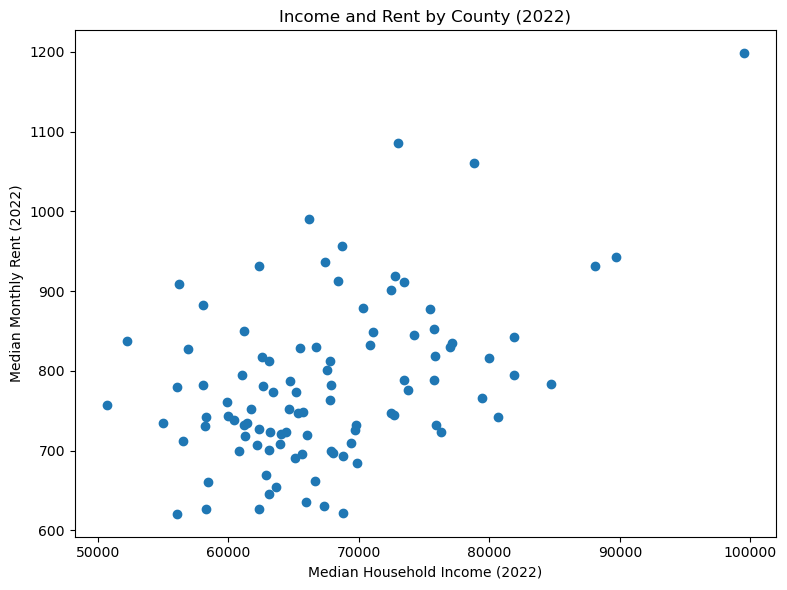

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df_2022["MedianHouseholdIncome"], df_2022["MedianRent"])
plt.xlabel("Median Household Income (2022)")
plt.ylabel("Median Monthly Rent (2022)")
plt.title("Income and Rent by County (2022)")
plt.tight_layout()
plt.show()

### Find the correlation between income and rent

In [28]:
# calculate correlation
corr_income_rent = df_2022["MedianHouseholdIncome"].corr(df_2022["MedianRent"])
corr_income_value = df_2022["MedianHouseholdIncome"].corr(df_2022["MedianHomeValue"])

print("Correlation between income and rent in 2022:", round(corr_income_rent, 3))
print("Correlation between income and home value in 2022:", round(corr_income_value, 3))

Correlation between income and rent in 2022: 0.462
Correlation between income and home value in 2022: 0.745


## Q2. Which Iowa counties experienced the greatest changes in rent, home value, and income from 2020 to 2022?

### Prepare data analysis

In [31]:
# filter to 2019 and 2022 data only
q2_df = merged_df[merged_df["Year"].isin([2019, 2022])].copy()

# keep only relevant columns
q2_df = q2_df[["County", "Year", "MedianRent", "MedianHomeValue", "MedianHouseholdIncome"]]

display(q2_df)

,County,Year,MedianRent,MedianHomeValue,MedianHouseholdIncome
0,Adair,2019,585,104600,53363
1,Adams,2019,549,87500,49255
2,Allamakee,2019,620,130400,52216
3,Appanoose,2019,624,81400,40167
4,Audubon,2019,582,79500,52055
...,...,...,...,...,...
391,Winnebago,2022,669,121700,62853
392,Winneshiek,2022,763,225400,67770
393,Woodbury,2022,913,158000,68399
394,Worth,2022,685,130600,69897


### Build a wide table by having one row per county and columns for 2019 and 2022

In [33]:
# pivot so that 2019 and 2022 become separate columns
wide_df = q2_df.pivot(
    index="County", 
    columns="Year", 
    values=["MedianRent", "MedianHomeValue", "MedianHouseholdIncome"]
)
# flatten MultiIndex columns
wide_df.columns = [f"{var}_{year}" for var, year in wide_df.columns]

wide_df.head()

,MedianRent_2019,MedianRent_2022,MedianHomeValue_2019,MedianHomeValue_2022,MedianHouseholdIncome_2019,MedianHouseholdIncome_2022
County,,,,,,
Adair,585,723,104600,131600,53363,63172
Adams,549,787,87500,109400,49255,64750
Allamakee,620,721,130400,156900,52216,64049
Appanoose,624,757,81400,113900,40167,50684
Audubon,582,735,79500,99900,52055,54973


### Compute changes (absolute and percent)

In [35]:
# calculate absolute changes
wide_df["Rent_change"] = wide_df["MedianRent_2022"] - wide_df["MedianRent_2019"]
wide_df["Value_change"] = wide_df["MedianHomeValue_2022"] - wide_df["MedianHomeValue_2019"]
wide_df["Income_change"] = wide_df["MedianHouseholdIncome_2022"] - wide_df["MedianHouseholdIncome_2019"]

# calculate percent changes
wide_df["Rent_pct_change"] = wide_df["Rent_change"] / wide_df["MedianRent_2019"] * 100
wide_df["Value_pct_change"] = wide_df["Value_change"] / wide_df["MedianHomeValue_2019"] * 100
wide_df["Income_pct_change"] = wide_df["Income_change"] / wide_df["MedianHouseholdIncome_2019"] * 100

wide_df.head()

,MedianRent_2019,MedianRent_2022,MedianHomeValue_2019,MedianHomeValue_2022,MedianHouseholdIncome_2019,MedianHouseholdIncome_2022,Rent_change,Value_change,Income_change,Rent_pct_change,Value_pct_change,Income_pct_change
County,,,,,,,,,,,,
Adair,585,723,104600,131600,53363,63172,138,27000,9809,23.589744,25.812620,18.381650
Adams,549,787,87500,109400,49255,64750,238,21900,15495,43.351548,25.028571,31.458735
Allamakee,620,721,130400,156900,52216,64049,101,26500,11833,16.290323,20.322086,22.661636
Appanoose,624,757,81400,113900,40167,50684,133,32500,10517,21.314103,39.926290,26.183185
Audubon,582,735,79500,99900,52055,54973,153,20400,2918,26.288660,25.660377,5.605609


### Find top counties by change and make bar charts

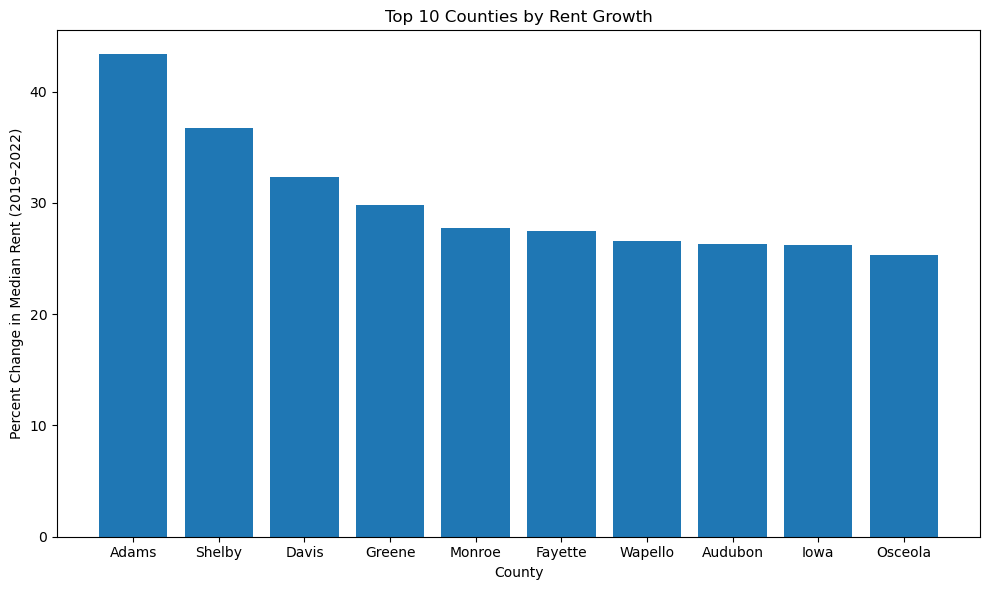

In [37]:
top_rent = wide_df.sort_values("Rent_pct_change", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_rent.index, top_rent["Rent_pct_change"])
plt.xlabel("County")
plt.ylabel("Percent Change in Median Rent (2019–2022)")
plt.title("Top 10 Counties by Rent Growth")
plt.tight_layout()
plt.show()

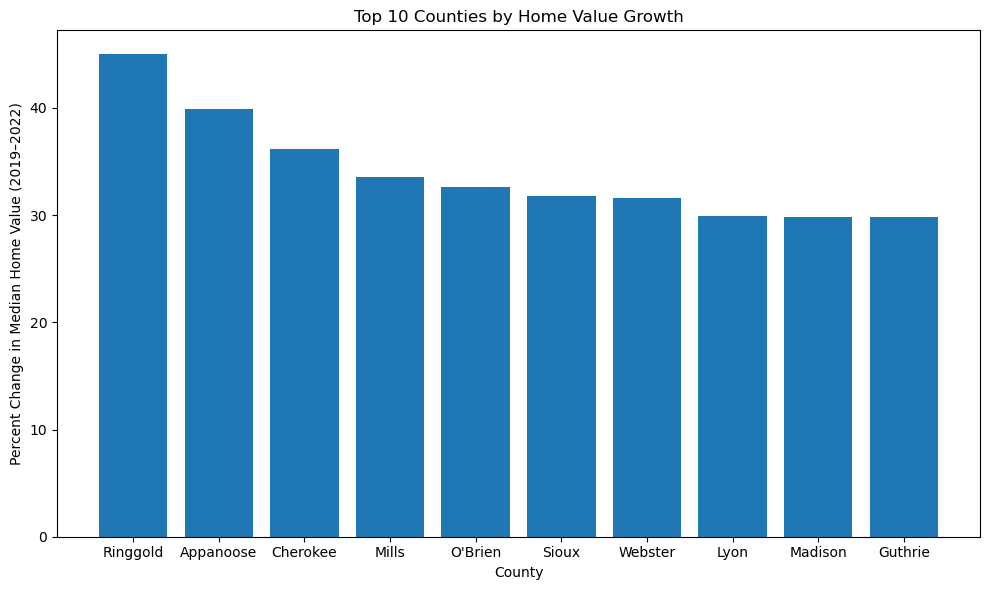

In [38]:
top_value = wide_df.sort_values("Value_pct_change", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_value.index, top_value["Value_pct_change"])
plt.xlabel("County")
plt.ylabel("Percent Change in Median Home Value (2019–2022)")
plt.title("Top 10 Counties by Home Value Growth")
plt.tight_layout()
plt.show()

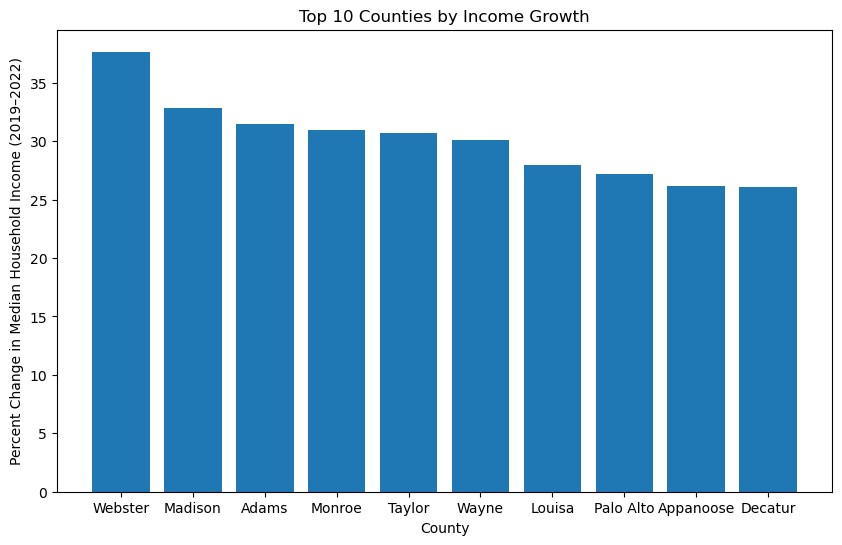

In [39]:
top_income = wide_df.sort_values("Income_pct_change", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_income.index, top_income["Income_pct_change"])
plt.xlabel("County")
plt.ylabel("Percent Change in Median Household Income (2019–2022)")
plt.title("Top 10 Counties by Income Growth")
plt.show()

## Q3. Are housing costs rising faster than incomes in certain counties?

### See the overall trend of incomes and house values

In [42]:
# create a statewide trend table
trend_df = (
    merged_df
    .groupby("Year")[["MedianHouseholdIncome", "MedianHomeValue"]]
    .mean()
    .reset_index()
)

trend_df

,Year,MedianHouseholdIncome,MedianHomeValue
0,2019,57259.606061,121817.171717
1,2020,58616.333333,126060.606061
2,2021,62208.505051,131533.333333
3,2022,67479.868687,149557.575758


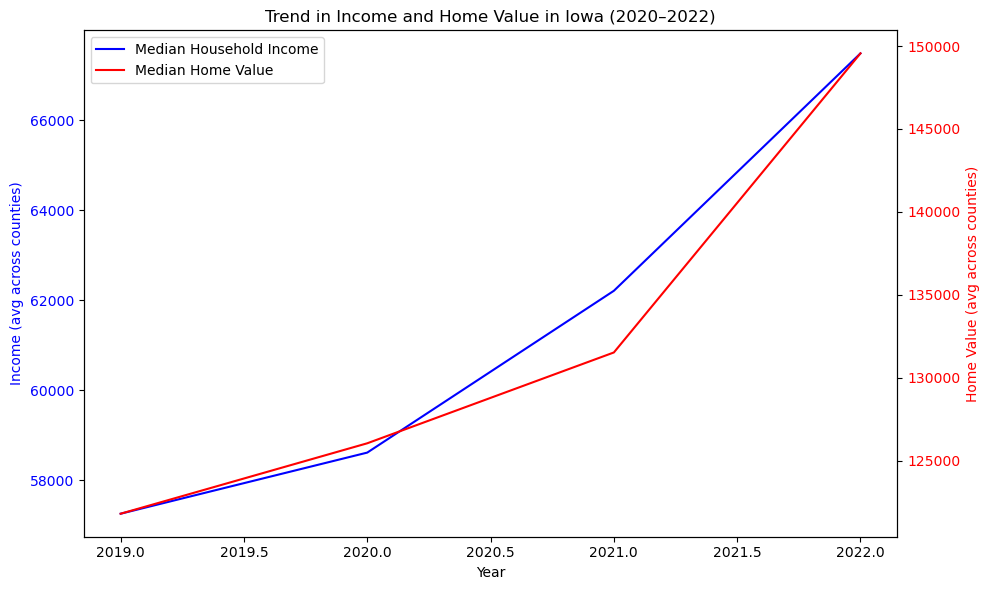

In [43]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# median income line
line1, = ax1.plot(
    trend_df["Year"],
    trend_df["MedianHouseholdIncome"],
    color="blue",
    label="Median Household Income"
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Income (avg across counties)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# median home value line
ax2 = ax1.twinx()
line2, = ax2.plot(
    trend_df["Year"],
    trend_df["MedianHomeValue"],
    color="red",
    label="Median Home Value"
)
ax2.set_ylabel("Home Value (avg across counties)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# combine legend entries from both lines
plt.legend([line1, line2],
           ["Median Household Income", "Median Home Value"],
           loc="upper left")

plt.title("Trend in Income and Home Value in Iowa (2020–2022)")
plt.tight_layout()
plt.show()

### Create a gap measure

In [45]:
# calculate gap between rent growth and income growth
wide_df["Rent_vs_Income_gap"] = wide_df["Rent_pct_change"] - wide_df["Income_pct_change"]
wide_df["Value_vs_Income_gap"] = wide_df["Value_pct_change"] - wide_df["Income_pct_change"]

# sort to find counties where housing costs outpaced income the most
gap_rent = wide_df.sort_values("Rent_vs_Income_gap", ascending=False).head(10)
gap_value = wide_df.sort_values("Value_vs_Income_gap", ascending=False).head(10)

gap_rent[["Rent_pct_change", "Income_pct_change", "Rent_vs_Income_gap"]].head()

,Rent_pct_change,Income_pct_change,Rent_vs_Income_gap
County,,,
Greene,29.780564,7.227144,22.553420
Audubon,26.288660,5.605609,20.683050
Fayette,27.450980,9.613128,17.837853
Shelby,36.702955,21.198276,15.504679
Ida,21.428571,8.040803,13.387768


### Visualization: counties where rent outpaced income

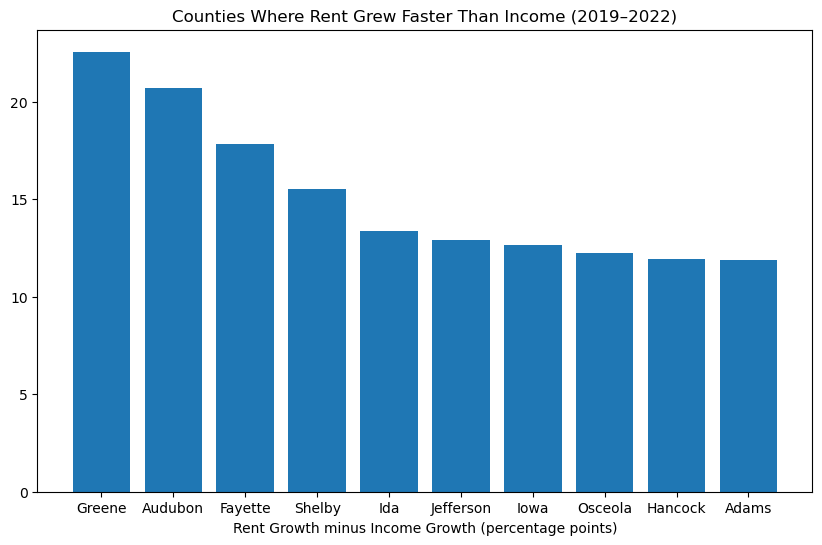

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(gap_rent.index, gap_rent["Rent_vs_Income_gap"])
plt.xlabel("Rent Growth minus Income Growth (percentage points)")
plt.title("Counties Where Rent Grew Faster Than Income (2019–2022)")
plt.show()

### Visualization: scatterplot of income vs rent growth

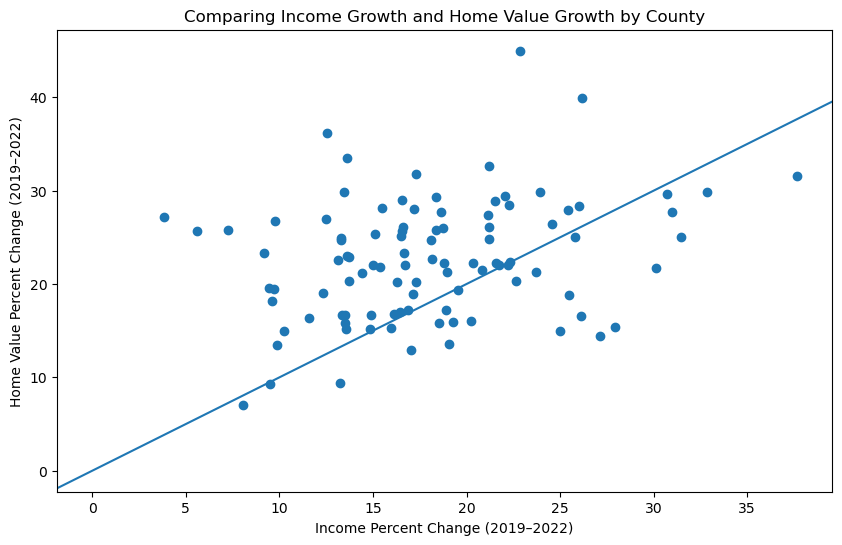

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(wide_df["Income_pct_change"], wide_df["Value_pct_change"])
plt.xlabel("Income Percent Change (2019–2022)")
plt.ylabel("Home Value Percent Change (2019–2022)")
plt.title("Comparing Income Growth and Home Value Growth by County")
plt.axline((0, 0), slope=1)
plt.show()